# REGRESIÓN LINEAL

* Regresión Lineal Simple
* Regresión Lineal Polinómica Simple
* Regresión Lineal Múltiple
* Regresión Comparativa

## 1. Importar Librerías

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import model_util as util

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 2. Cargar datos

In [214]:
ruta = '../data/calidad_aire_clean_outliers.csv'
df = pd.read_csv(ruta, delimiter=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


## 3. Regresión Lineal Simple

* Entrada X = ICA 
* Salida y = NO2
* Separar los datos en entrenamiento y test

In [215]:
X = df[['ICA']]
y = df['NO2']

# 80% Entrenamiento: X_train, y_train
# 20% Test: X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Entrenammiento {X_train.shape} {y_train.shape}')
print(f'Test {X_test.shape} {y_test.shape}')

Entrenammiento (24688, 1) (24688,)
Test (6172, 1) (6172,)


* EDA entre datos de entrenamiento y datos de prueba

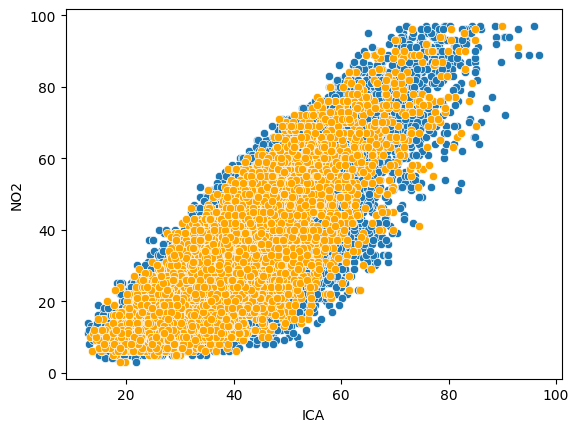

In [216]:
sns.scatterplot(x=X_train['ICA'], y=y_train)
sns.scatterplot(x=X_test['ICA'], y=y_test, c='orange');

* Entrenamiento del modelo
* Predicciones

In [217]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

* Explorar datos de prueba con prediciones

<Axes: xlabel='ICA', ylabel='NO2'>

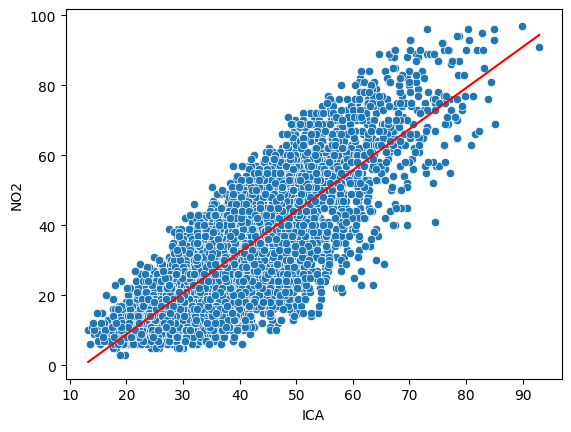

In [218]:
# Test vs prediccion
sns.scatterplot(x=X_test['ICA'], y=y_test) # test
sns.lineplot(x=X_test['ICA'], y=y_pred, c='r') # predicciones

Margen de error: Comprobar en cuánto se equivoca el modelo. 
Cuánto menor sea el error mejor es la predicción

* MAE


In [219]:
mae = mean_absolute_error(y_test, y_pred)
mae

8.039774350510505

* RMSE

In [220]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'mse: {mse}')
print(f'rmse {rmse}')

mse: 102.3504802548885
rmse 10.116841416909157


## 4. Regresión Lineal Simple Polinómica

* Transformar la entrada X agregando nuevas características que son el cuadrado de las variables de entredaa orignales
* Grado 2 

In [221]:

repocessor = PolynomialFeatures(degree=2)
X_g2 = repocessor.fit_transform(X)
X_g2

array([[1.0000000e+00, 4.5220000e+01, 2.0448484e+03],
       [1.0000000e+00, 4.5640000e+01, 2.0830096e+03],
       [1.0000000e+00, 4.7940000e+01, 2.2982436e+03],
       ...,
       [1.0000000e+00, 3.8440000e+01, 1.4776336e+03],
       [1.0000000e+00, 3.2650000e+01, 1.0660225e+03],
       [1.0000000e+00, 3.5860000e+01, 1.2859396e+03]])

* Entrenamiento del modelo

In [222]:
model = LinearRegression()
model.fit(X_g2,y)

y_pred = model.predict(X_g2)
y_pred

array([37.77165621, 38.26980782, 41.02432329, ..., 29.93717779,
       23.55545719, 27.05837231])

* Explorar datos con las predicciones

<Axes: xlabel='ICA', ylabel='NO2'>

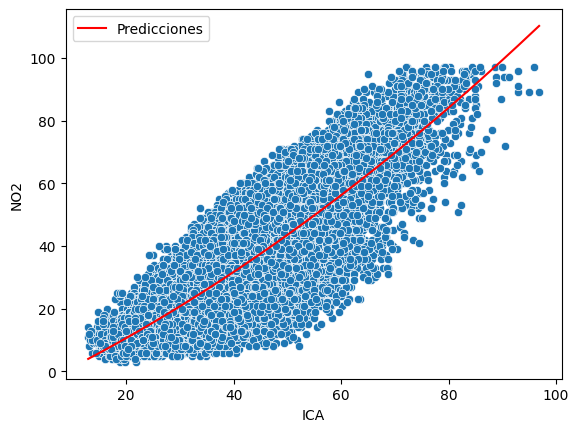

In [223]:
sns.scatterplot(data=df, x='ICA', y=df['NO2'])
sns.lineplot(x=df['ICA'], y=y_pred.flatten(), color='r', label='Predicciones')

* Polinomial de grado 3

In [224]:
repocessor = PolynomialFeatures(degree=3)
X_g3 = repocessor.fit_transform(X)
X_g3
model = LinearRegression()
model.fit(X_g3,y)
y_pred = model.predict(X_g3)
y_pred

array([37.81326805, 38.32839262, 41.17659918, ..., 29.74950898,
       23.31796257, 26.82538718])

* Explorar datos con las predicciones

<Axes: xlabel='ICA', ylabel='NO2'>

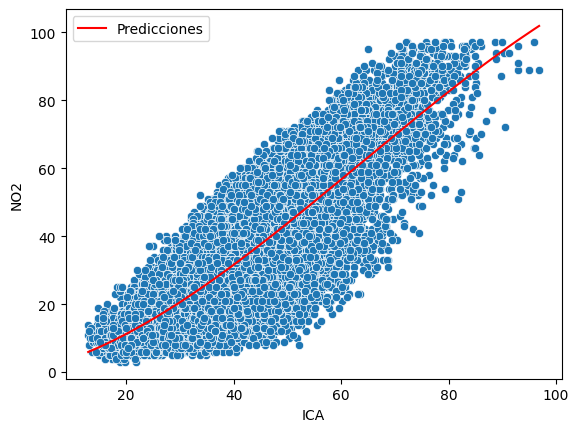

In [225]:
sns.scatterplot(data=df, x='ICA', y=df['NO2'])
sns.lineplot(x=df['ICA'], y=y_pred.flatten(), color='r', label='Predicciones')

##  5. Regresión Lineal Múltiple

* Entrada X = ICA 
* Salida: Variables más correlacionadas
     - y = NO2, PM2.5, PM10, BTX, TEMPERATURA, HUMEDAD
* Separar los datos en entrenamiento y test

In [226]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')

* Entrenar el modelo
* Obtener predicciones
* Obtener métricas

In [227]:
X = df[['NO2', 'PM2.5', 'PM10', 'BTX', 'TEMPERATURA', 'HUMEDAD']]
y = df['ICA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 

print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"rmse: {mean_squared_error(y_test, y_pred, squared=False)}")

mae: 2.447539874474084
rmse: 3.1532474759924574


* Obtener residuos
* residuos = diferencia entre valores reales y las predicciones

In [228]:
residuos = y_test - y_pred
residuos

15236    3.603269
22764    2.243765
30064   -4.511038
1109    -3.883905
2754     1.188246
           ...   
4258     0.921105
30278    0.359649
26040   -3.060517
21523    2.159658
9538     2.036147
Name: ICA, Length: 6172, dtype: float64

* Explorar residuos mediante histograma con suavizado 

<Axes: xlabel='ICA', ylabel='Count'>

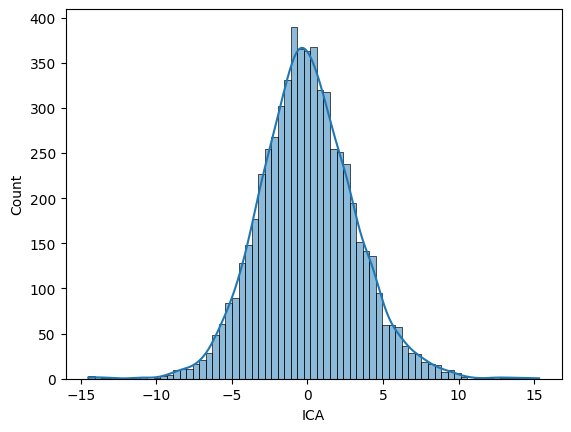

In [229]:

sns.histplot(residuos, kde=True)

* Explorar predicciones con residuos

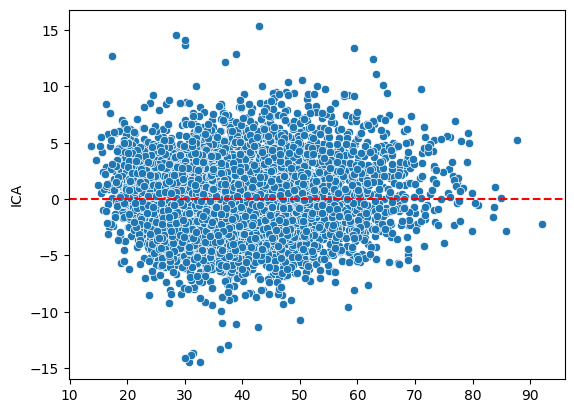

In [230]:
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(y=0, color='r', linestyle='--')

## 6. Regresión comparativa

In [231]:
df_results = pd.DataFrame(columns=['model_name', 'mae_train', 'rmse_train', 'mae_test', 'rmse_test'])

#### 6.1.  Regresión lineal simple (RSL)

1 feature/ característica de entrada.

* NO2:  La más correlacionada con ICA (0.81)
* PM10: La siguiente más correlacionada con ICA (0.67)

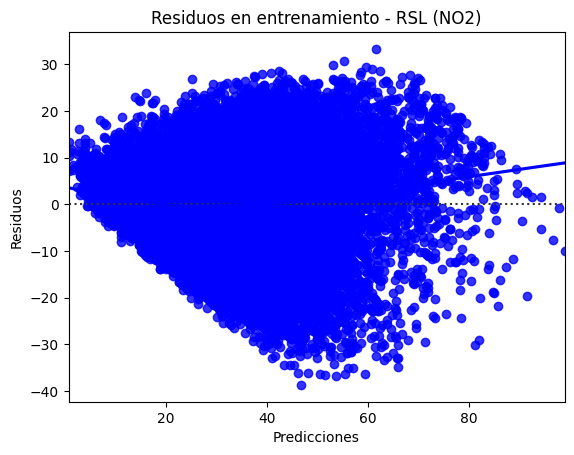

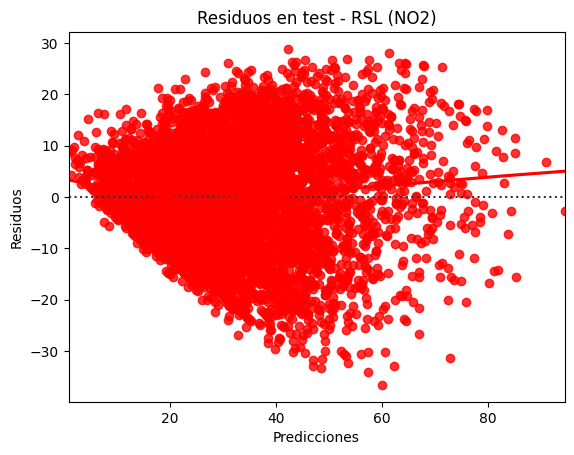

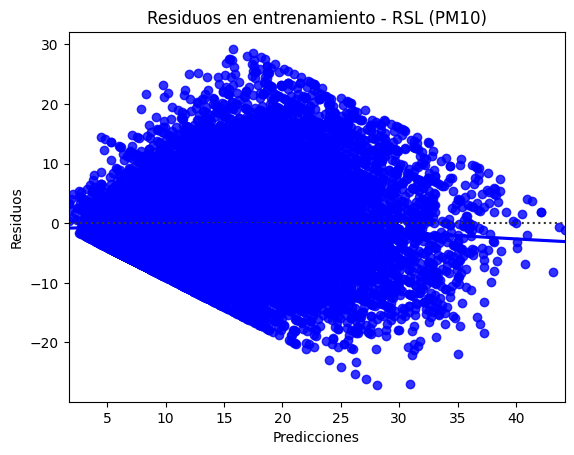

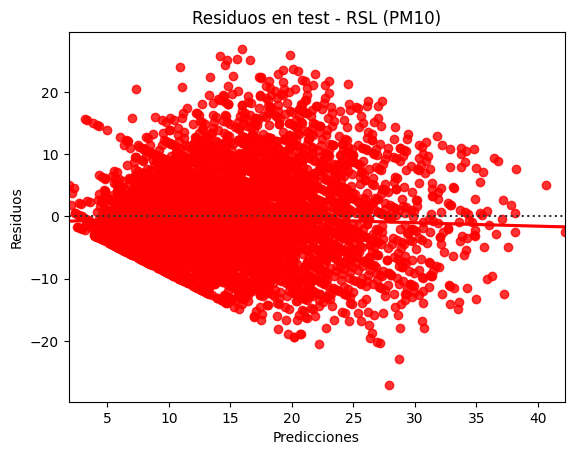

In [232]:
# RLS con NO2
X = df[['ICA']]
y = df['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()

df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'RSL (NO2)', df_results)

# RLS con PM10
X = df[['ICA']]
y = df['PM10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()

df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'RSL (PM10)', df_results)

#### 6.2.  Regresión Polinómica Simple (RPL)

1 feature/ característica de entrada.

* NO2:  La más correlacionada con ICA (0.81)
* PM10: La siguiente más correlacionada con ICA (0.67)

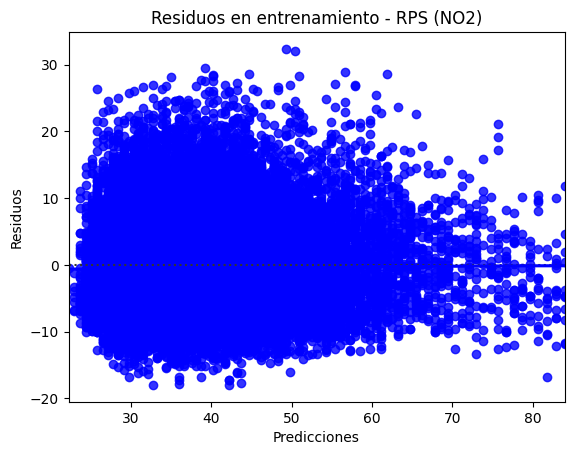

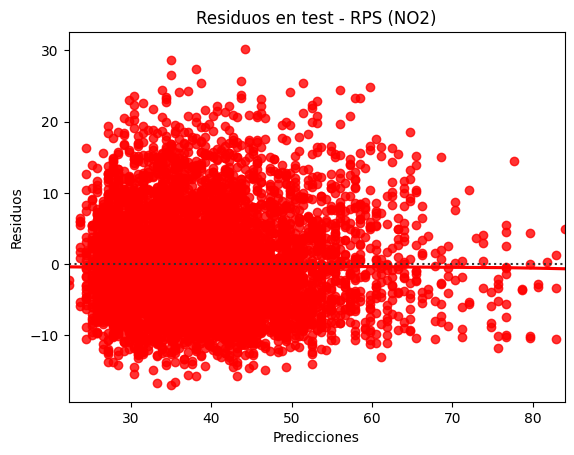

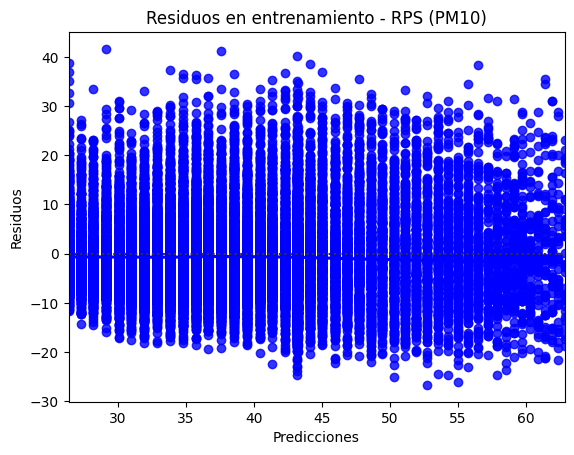

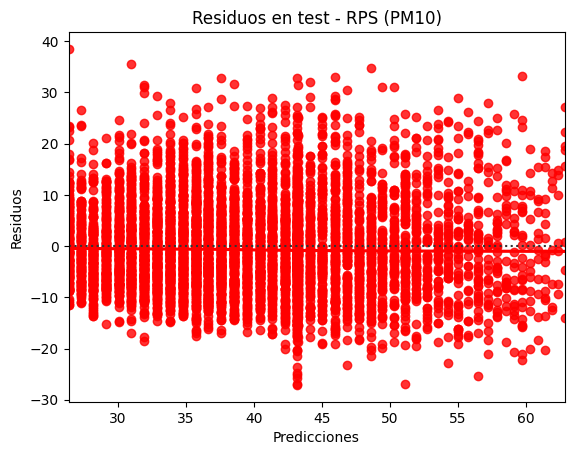

In [233]:
# RLS con NO2
X = df[['NO2']]
y = df[['ICA']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

preprocessor = PolynomialFeatures(degree=3)
X_train = preprocessor.fit_transform(X_train) # fit_transform ajusta el procesador a los datos train y los transforma
X_test = preprocessor.transform(X_test) # transforma los datos de test utilizando parámetros ya calculados en train
model = LinearRegression()

df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'RPS (NO2)', df_results)

# RLS con PM10
X = df[['PM10']]
y = df[['ICA']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

preprocessor = PolynomialFeatures(degree=3)
X_train = preprocessor.fit_transform(X_train) # fit_transform ajusta el procesador a los datos train y los transforma
X_test = preprocessor.transform(X_test) # transforma los datos de test utilizando parámetros ya calculados en train
model = LinearRegression()

df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'RPS (PM10)', df_results)

#### 6.3. Regresión Lineal Múltiple (RLM)

Variables con más correlación (Calidad del Aire):

* NO2:  (0.81)
* PM2.5: (0.47)
* PM10: (0.67)
* BTX: (0.44)

Variables con más correlación (Metereología):
* TEMPERATURA:  (0.31)
* HUMEDAD: (-0.38)

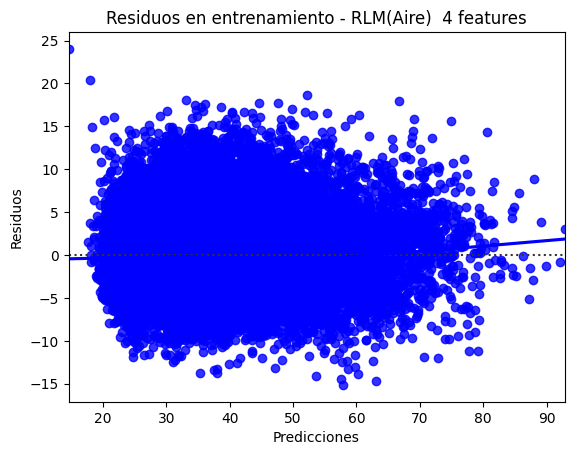

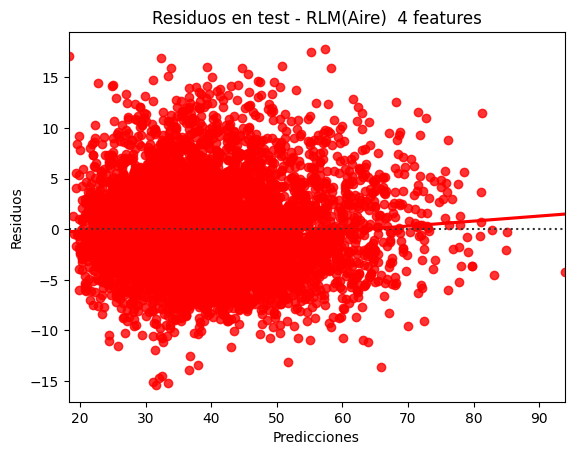

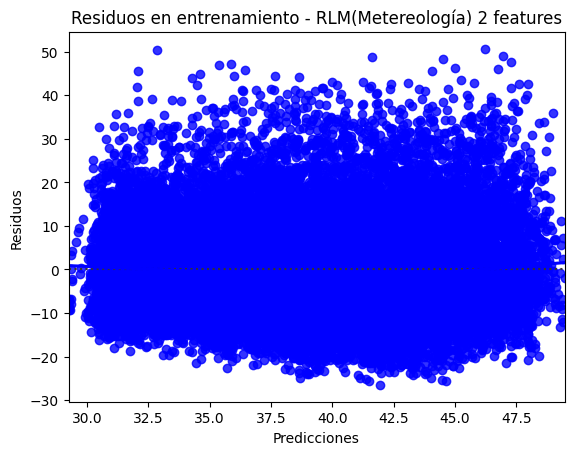

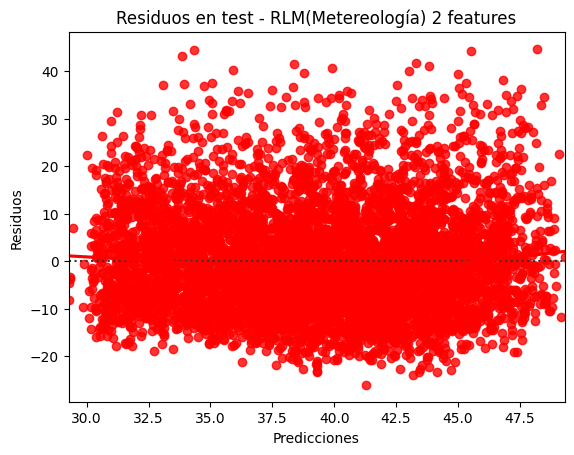

In [234]:
# Varibles de calidad del aire
X = df[['NO2', 'PM2.5', 'PM10', 'BTX']]
y = df['ICA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'RLM(Aire)  4 features', df_results)

# Varibles de metereología
X = df[['TEMPERATURA', 'HUMEDAD']]
y = df['ICA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'RLM(Metereología) 2 features', df_results)

#### 6.4. Regresión lineal múltiple polinomial (RPM 2,7)

+ Grado 2
* 7 features 

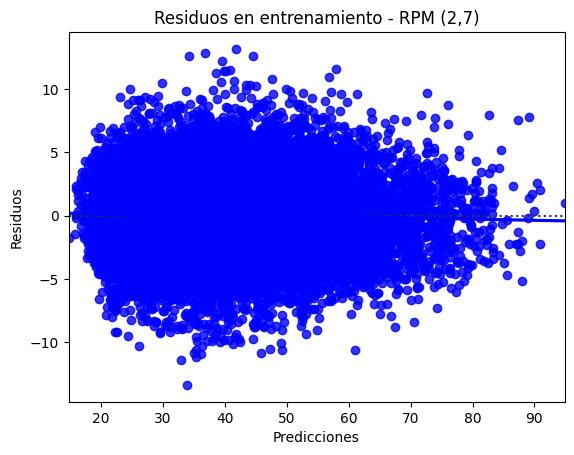

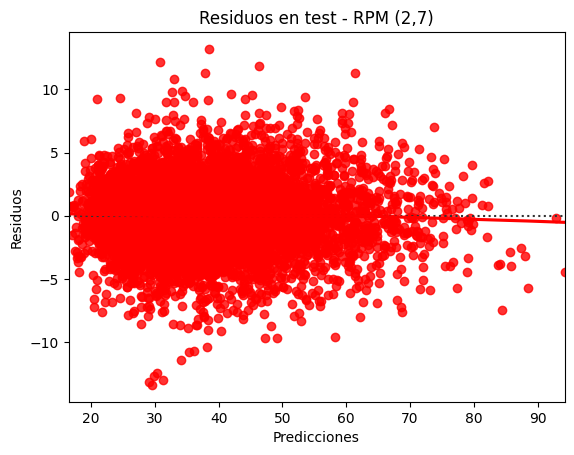

In [235]:
X = df[['SO2', 'NO2', 'PM2.5', 'PM10', 'BTX', 'TEMPERATURA', 'HUMEDAD']]
y = df['ICA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
preprocessor = PolynomialFeatures(degree=2)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
model = LinearRegression()
df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'RPM (2,7)', df_results)

#### 6.5 Regresión Regularizada (ElasticNet)

In [236]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')

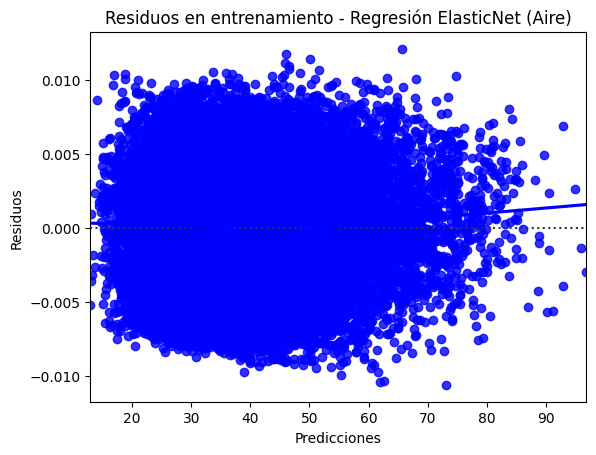

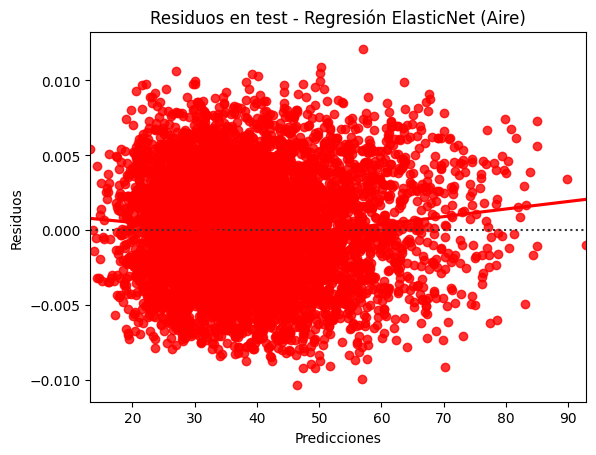

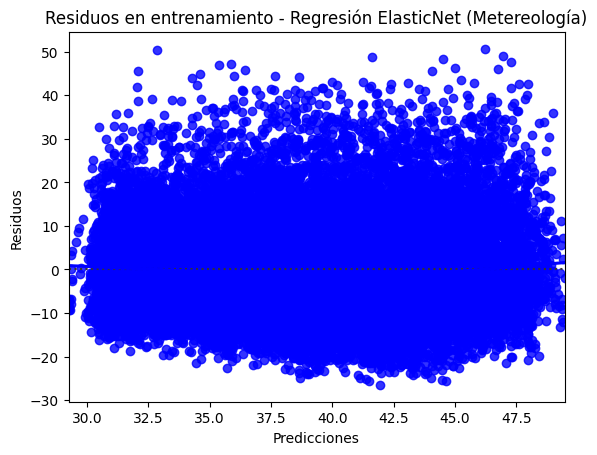

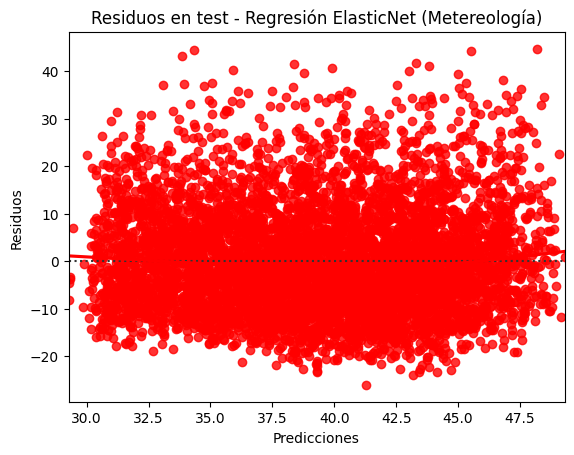

In [237]:
# AIRE 
X = df[['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX']]
y = df['ICA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = ElasticNet(alpha=0.01)
df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'Regresión ElasticNet (Aire)', df_results)

# Metereología  
X = df[['TEMPERATURA', 'HUMEDAD']]
y = df['ICA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = ElasticNet(alpha=0.01)
df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'Regresión ElasticNet (Metereología)', df_results)

#### 6.6. Regresión KNN

In [238]:
df.columns

Index(['FECHA', 'ANO', 'MES', 'DIA', 'HORA', 'DIA_SEMANA', 'ESTACION', 'SO2',
       'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD',
       'ICA_SO2', 'ICA_PM10', 'ICA_O3', 'ICA_NO2', 'ICA'],
      dtype='object')

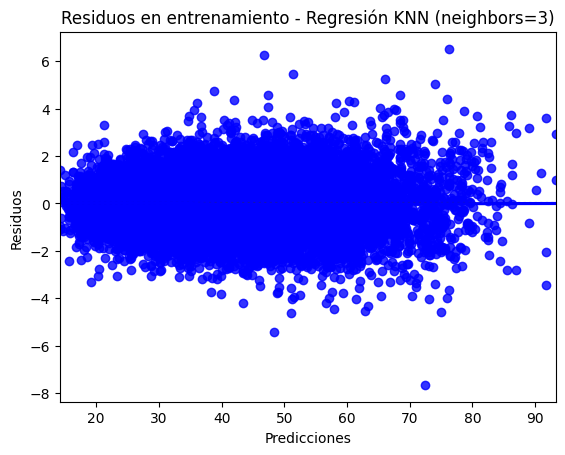

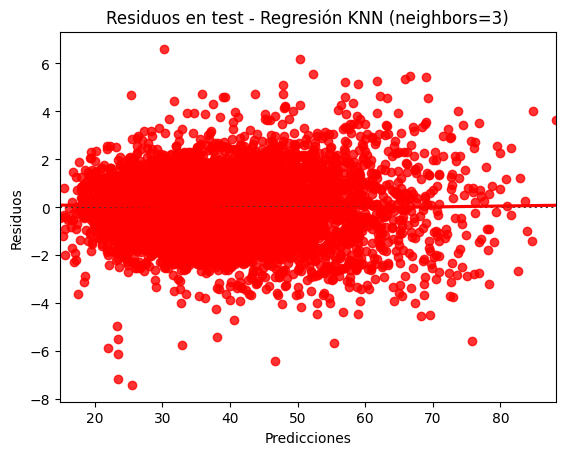

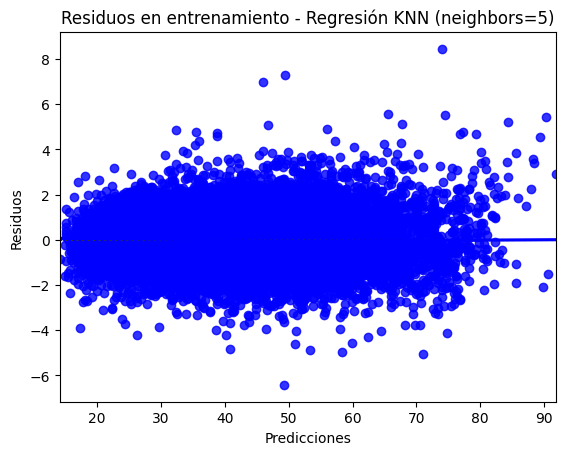

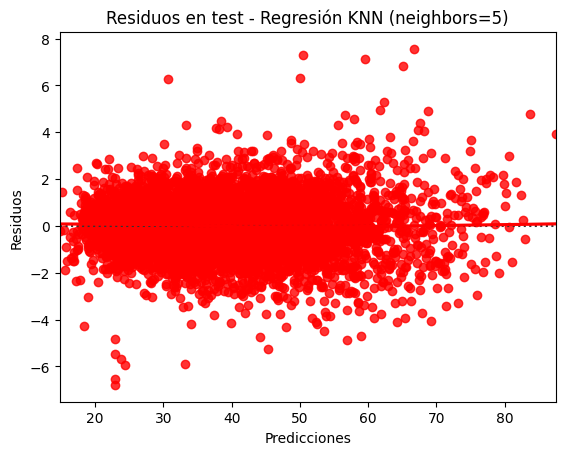

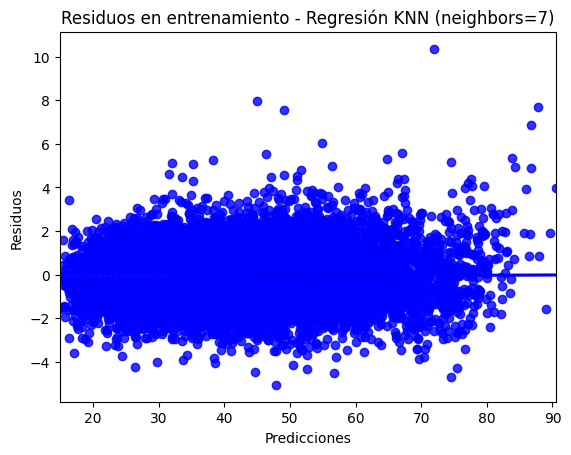

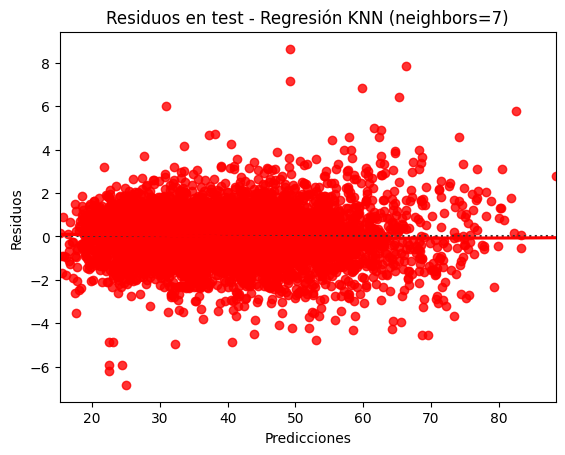

,model_name,mae_train,rmse_train,mae_test,rmse_test
0,RSL (NO2),8.130696,10.257342,8.039774,10.116841
1,RSL (PM10),5.142858,6.665940,5.161640,6.659059
2,RPS (NO2),5.591415,7.023001,5.604628,7.031106
3,RPS (PM10),6.902330,8.828943,6.962326,8.834594
4,RLM(Aire) 4 features,3.444435,4.425356,3.439090,4.429286
5,RLM(Metereología) 2 features,8.758510,11.021143,8.785365,11.051425
6,"RPM (2,7)",2.168030,2.780727,2.147786,2.790250
7,Regresión ElasticNet (Aire),0.003113,0.003794,0.003150,0.003839
8,Regresión ElasticNet (Metereología),8.758521,11.021143,8.785377,11.051432
9,Regresión KNN (neighbors=3),0.731690,0.958482,1.010852,1.339771


In [239]:
X = df[['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX','TEMPERATURA', 'HUMEDAD']]
y = df['ICA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=3)

df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'Regresión KNN (neighbors=3)', df_results)
X = df[['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX','TEMPERATURA', 'HUMEDAD']]
y = df['ICA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5)
df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'Regresión KNN (neighbors=5)', df_results)

X = df[['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX','TEMPERATURA', 'HUMEDAD']]
y = df['ICA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=7)
df_results = util.evaluate_model(model, X_train, X_test, y_train, y_test, 'Regresión KNN (neighbors=7)', df_results)
df_results

#### 6.6. Comparación de resultados

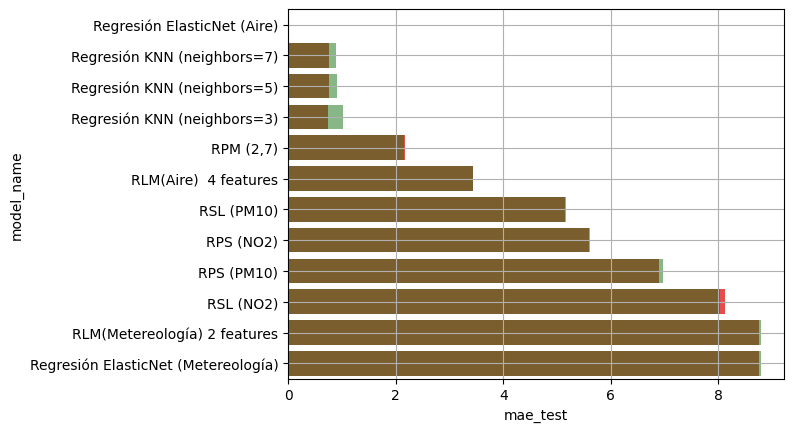

In [240]:
# Gráfico de barras mae_train vs mae_test de df_results
#df_results.head(15)

df_results = df_results.sort_values('mae_test')

sns.barplot(data=df_results, x='mae_train', y='model_name', color='red', alpha=0.8)
sns.barplot(data=df_results, x='mae_test', y='model_name', color='green', alpha=0.5)
plt.grid()


Observando los valores de estas métricas, podemos tomar la siguiente conclusión:

    El modelo "Regresión lineal múltiple con 9 features" tiene el menor MAE tanto en el conjunto de entrenamiento (0.002498) como en el conjunto de prueba (0.002522). También tiene el menor RMSE en el conjunto de entrenamiento (0.003059) y en el conjunto de prueba (0.003077).

Basado en estos resultados, el modelo "Regresión lineal múltiple con 9 features" parece ser el mejor modelo entre los presentados. Sin embargo, es importante considerar otros factores, como la calidad y representatividad de los datos utilizados en el análisis, así como las características específicas del problema que se está abordando.